### Objective

Here, we are trying to deploy the Rock-Paper-Scissors image classifier on Heroku using Flask API. 

### Heroku

Heroku is a container-based cloud Platform as a Service (PaaS). Developers use Heroku to deploy, manage, and scale modern apps.







Now we shall create the app.py file, where we define all the routes and functions to perform for each action. This file is the root of our Flask application which we will run in the command line prompt.

## app.py

In [ ]:
from flask import Flask,render_template,request
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
import tensorflow as tf
import os


app=Flask(__name__,template_folder='Templates')

@app.route("/",methods=['GET'])
def home_page():   
    return render_template('index.html')   


@app.route("/",methods=['POST'])
def predict():
    imagefile=request.files['imagefile']
    #imagepath="./images/"+imagefile.filename
    imagepath=os.path.join("./images",imagefile.filename)
    imagefile.save(imagepath)

    image=load_img(imagepath,target_size=(150,150))
    image=img_to_array(image)
    image=np.expand_dims(image,axis=0)
    image=image/255.

    model=tf.keras.models.load_model('model_cnn.hdf5')
    prediction=model.predict(image)
    label=np.argmax(prediction,axis=-1)

    result=' '
    if label==0:
        result="paper"
    elif label==1:
        result="rock"
    else:
        result="scissors"

    return render_template('index.html',output=result)

if __name__ == "__main__":
# app.run(host, port, debug, options)
    app.run(port=3000,debug=True)
	

Now, we can design a html page which is to be displayed on web. Let's name this file as index.html. This file is placed inside a folder named 'Templates'.


## index.html

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>Rock-Paper-Scissors-Image Classifier</title>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    </head>
    <body>
        <h1 class="text-center">Image Predictor</h1>

        <form class="p-3 text-center" action="/" method="post" enctype="multipart/form-data">
            <input class="form-control" type="file" name="imagefile">
            <input class="btn btn-primary mt-3" type="submit" value="Predict Image">
        </form>

        {% if output %}
            <p class="text-center"> Image is a {{output}}</p>
        {% endif %}
    </body>
</html>

## Procfile

In [ ]:
web: gunicorn app:app

Heroku apps include a Procfile that specifies the commands that are executed by the app on startup.

## requirements.txt

In [ ]:
click==8.1.3
colorama==0.4.5
Flask==2.1.3
flatbuffers==1.12
itsdangerous==2.1.2
Jinja2==3.0.1
keras==2.8.0rc0
libclang==14.0.1
Markdown==3.4.1
MarkupSafe==2.1.1
numpy==1.23.1
oauthlib==3.2.0
opt-einsum==3.3.0
protobuf==3.19.4
pyasn1==0.4.8
pyasn1-modules==0.2.8
pyparsing==3.0.9
rsa==4.9
six==1.16.0
tensorboard-data-server==0.6.1
tensorboard-plugin-wit==1.8.1
tensorflow-estimator==2.9.0
tensorflow-io-gcs-filesystem==0.26.0
termcolor==1.1.0
typing_extensions==4.3.0
urllib3==1.26.10
Werkzeug==2.2.0
wrapt==1.14.1
tensorflow-cpu==2.8.0
gunicorn==20.1.0
Pillow==9.2.0

The requirements. txt file lists the app dependencies together. When an app is deployed, Heroku reads this file and installs the appropriate Python dependencies using the pip install -r command.

## Deploying on Heroku


#https://www.freecodecamp.org/news/how-to-deploy-an-application-to-heroku/

Go to this link to access the Rock-paper-scissors image classifier web application :
    
 https://rps-img-classifier.herokuapp.com/

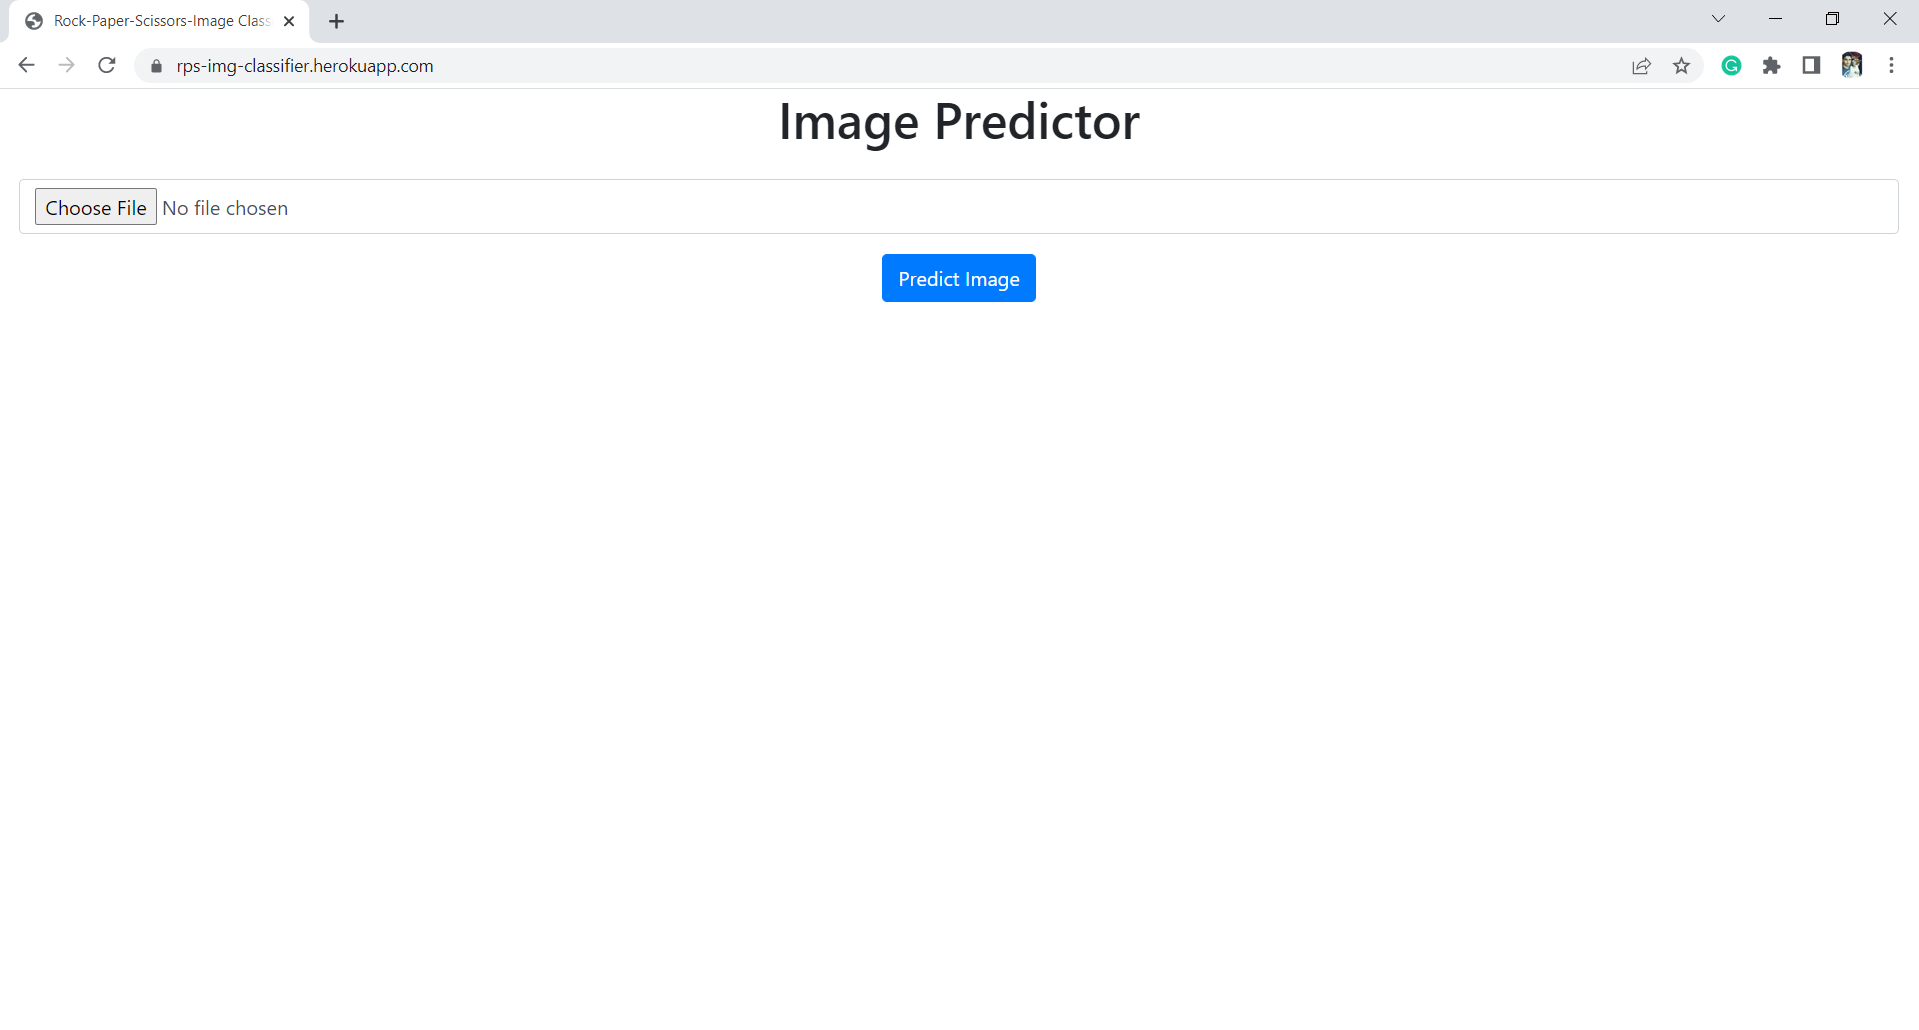

Click on 'Choose file' for uploading a image

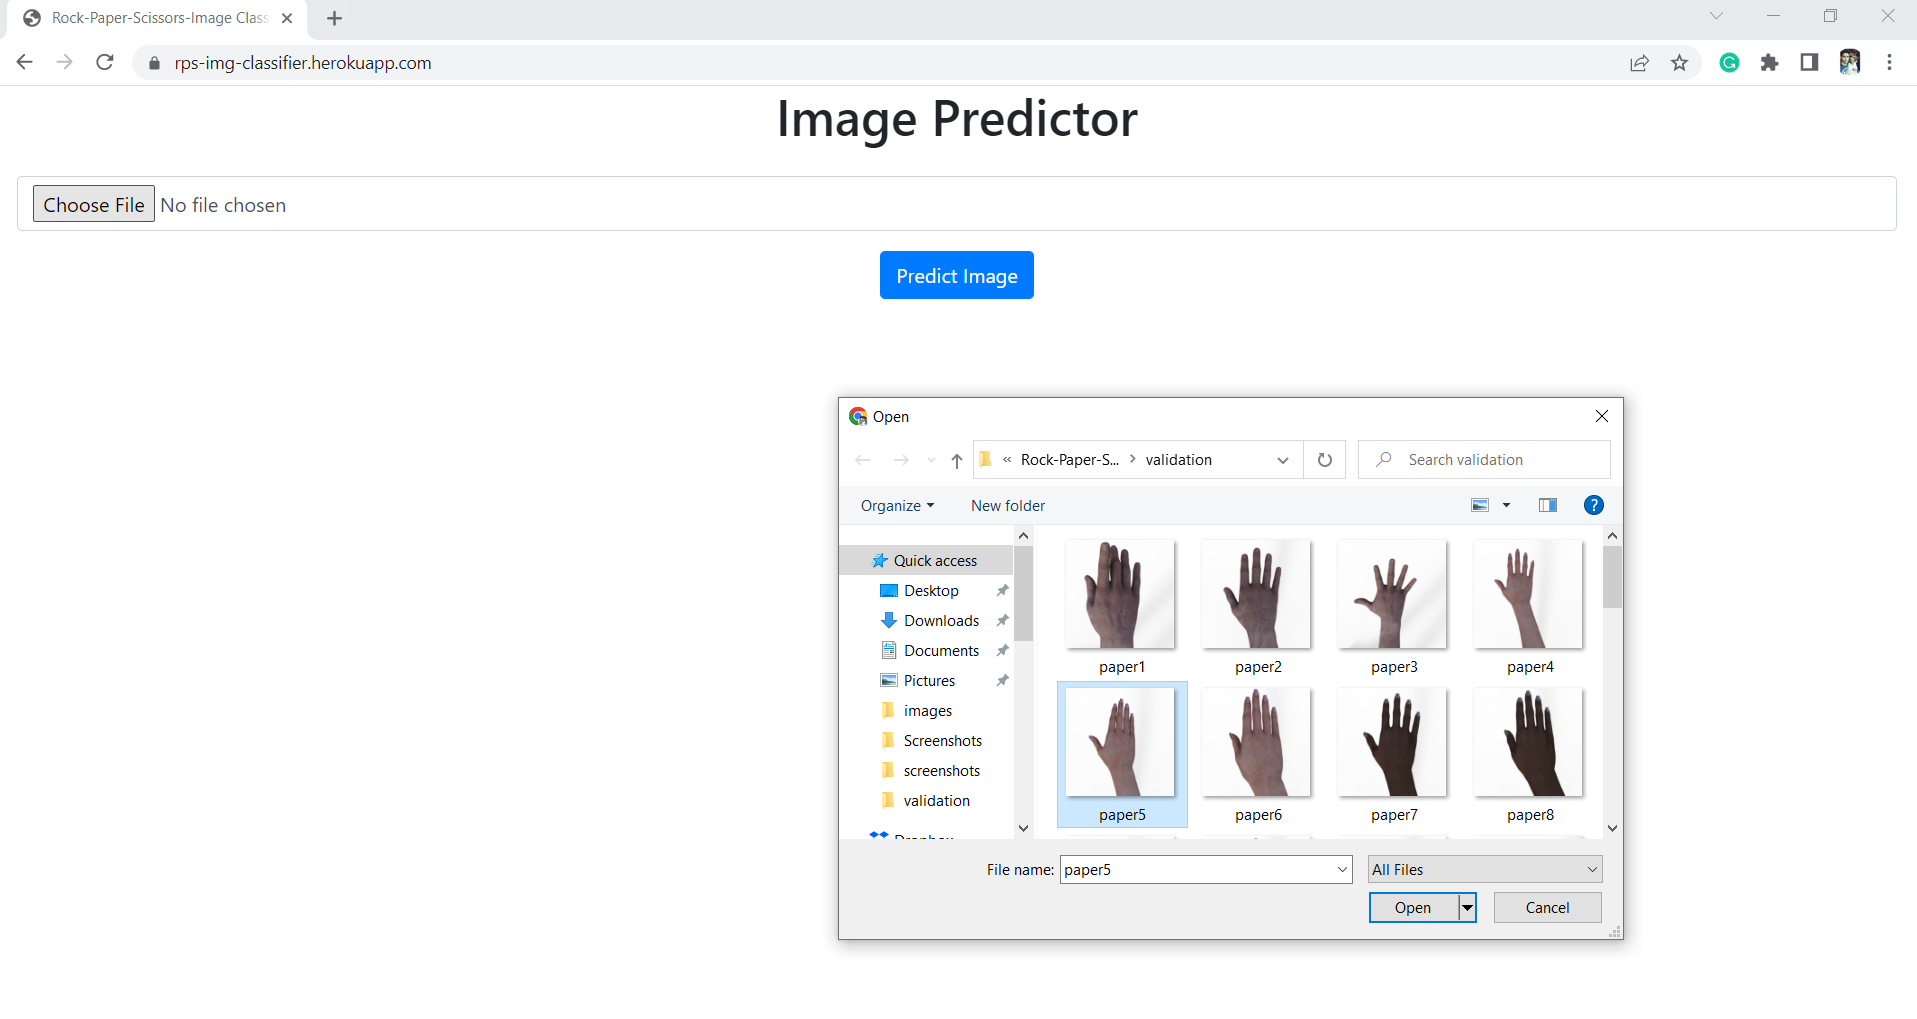

After selecting the image , Click on the 'Predict Image' button.

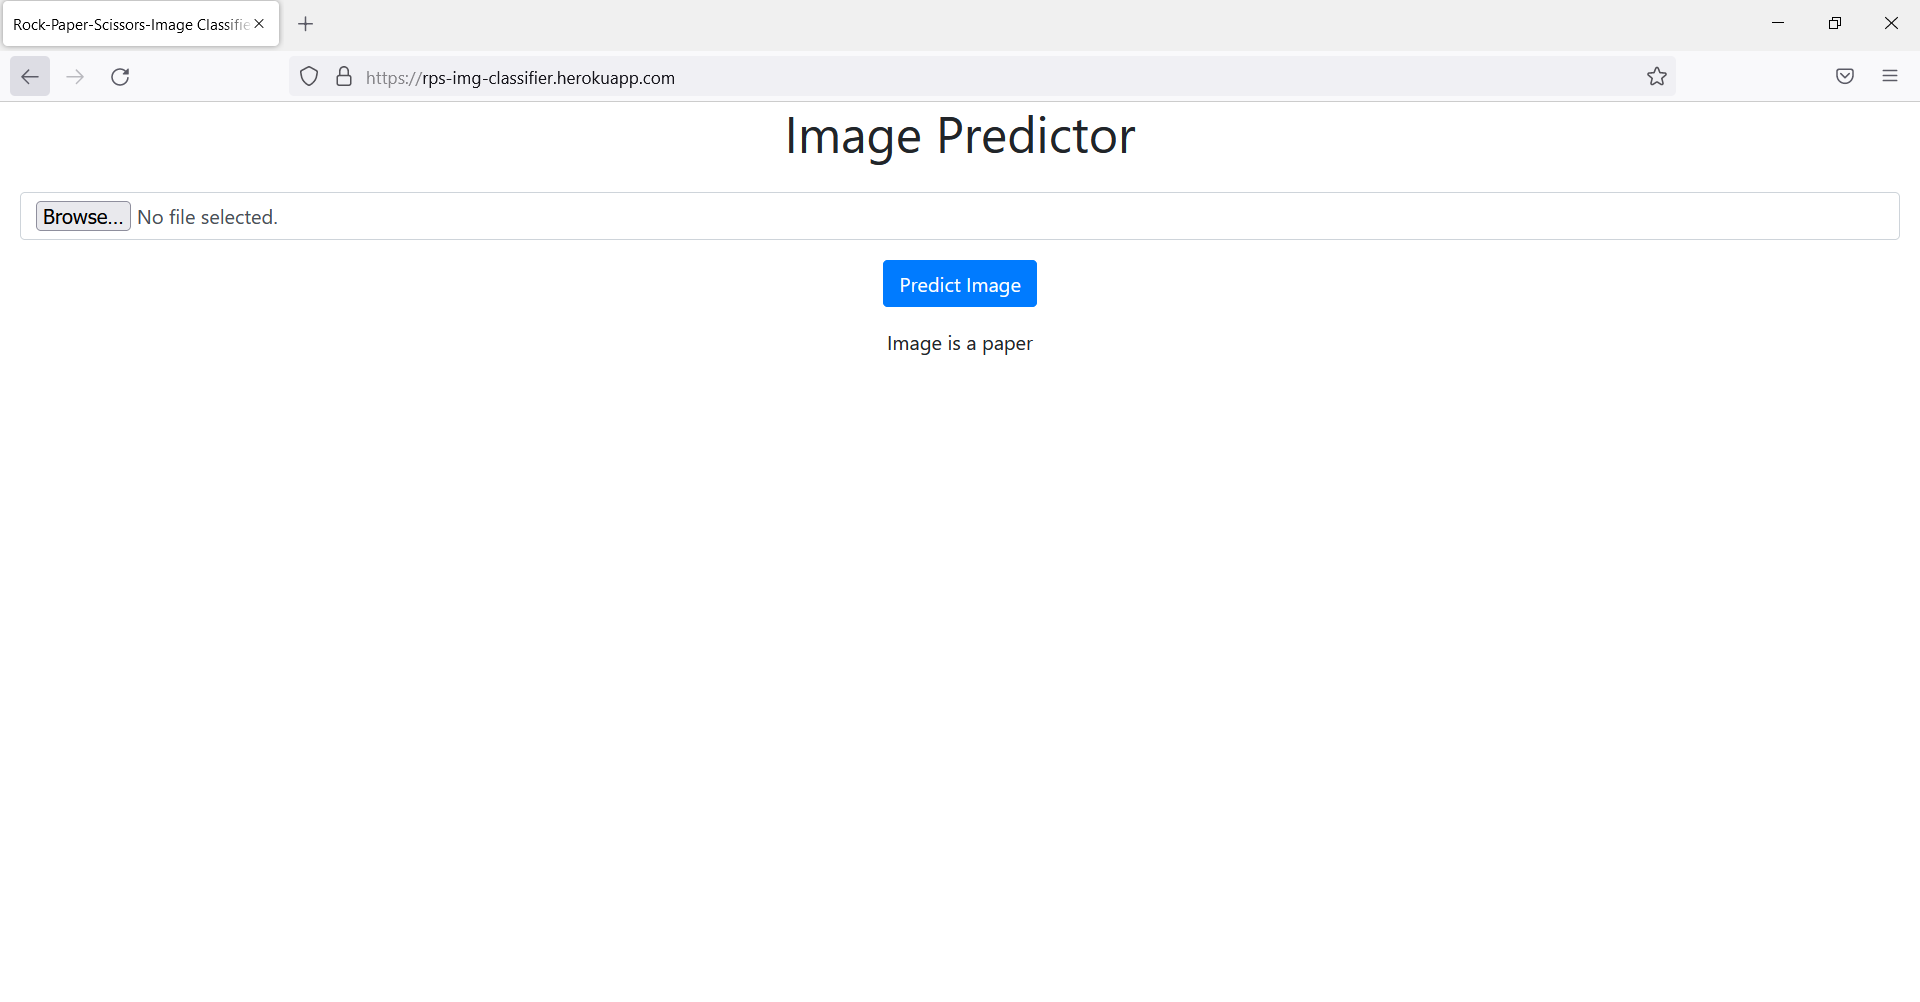

Here, we could see that the prediction appears as 'Image is a paper' .